In [1]:
import numpy as np
import pandas as pd

About Dataset

The dataset is Telco Customer Churn dataset from kaggle

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." 
[IBM Sample Data Sets]

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, 
   device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing,
   monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

In [2]:
df=pd.read_csv("Customer-Churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2812,3763-GCZHZ,Male,0,Yes,No,66,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,104.05,6890,Yes
6086,0916-KNFAJ,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Mailed check,69.90,4226.7,No
1409,5977-CKHON,Female,0,Yes,Yes,43,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),92.55,4039,No
2907,0611-DFXKO,Male,0,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,89.00,1820.45,Yes
1507,7427-AUFPY,Male,0,No,No,54,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.65,1008.7,No


In [4]:
df.shape

(7043, 21)

Dropping the customerID column as we can see it doesn't contribute to the dataset as much and,
printing the rest of the column names and their datatypes.

In [6]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here we can see that the TotalCharges is a string but MothlyCharges is an interger. So, we have to convert TotalCharges to 
numeric. 

In [7]:
df.TotalCharges.values, df.MonthlyCharges.values

(array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
       dtype=object),
 array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65]))

Coercion is the implicit conversion of an instance of one type to another during an operation which involves two arguments of the same type or we can say it just fill the position which is empy with NA.
Here we can see the TotalCharges that don't contain any value.

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [11]:
df.iloc[488]['TotalCharges']

' '

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce')

So i have dropped all the 11 rows

In [12]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

Now we are converting the datatype of TotalChages to numeric

In [13]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\brago\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
df1.TotalCharges.dtypes

dtype('float64')

In [15]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

Red color represents customer who are not leaving and green bar represents who are leaving.
We can see the number of customers who has more tenure is not leaving.

In [16]:
import matplotlib.pyplot as plt

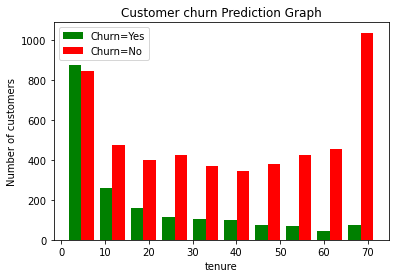

In [17]:
plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer churn Prediction Graph')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

Now we are plotting the same graph based on the monthly charges.

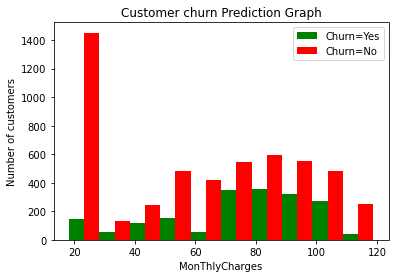

In [18]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('MonThlyCharges')
plt.ylabel('Number of customers')
plt.title('Customer churn Prediction Graph')

plt.hist([mc_churn_yes,mc_churn_no],rwidth=1.25,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_and_object_value(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

Here we can see the columns with string datatypes has various types. So we have to convert all the strings to numeric data.

In [20]:
print_unique_and_object_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
print_unique_and_object_value(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


C:\Users\brago\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']


for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\brago\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [23]:
df1['gender'].replace('Male',0,inplace=True)
df1['gender'].replace('Female',1,inplace=True)

In [24]:
for column in df1:
    print(f'{column}: {df1[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


Here I am usig One Hot Encoding for the InternetServices, Contract and PaymentMethon columns as they have more than 2 types of
methods

In [25]:
#One Hot Encoding
df2=pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

Now all of the columns have converted to numeric.

In [26]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5105,1,1,1,0,40,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1429,0,0,1,1,45,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
7016,1,0,0,0,1,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0


In [27]:
df2.shape

(7032, 27)

In [28]:
df2.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

Out of 7032 customer 1869 customer has left.

In [30]:
df2.loc[df2['Churn']==1].count()

gender                                     1869
SeniorCitizen                              1869
Partner                                    1869
Dependents                                 1869
tenure                                     1869
PhoneService                               1869
MultipleLines                              1869
OnlineSecurity                             1869
OnlineBackup                               1869
DeviceProtection                           1869
TechSupport                                1869
StreamingTV                                1869
StreamingMovies                            1869
PaperlessBilling                           1869
MonthlyCharges                             1869
TotalCharges                               1869
Churn                                      1869
InternetService_DSL                        1869
InternetService_Fiber optic                1869
InternetService_No                         1869
Contract_Month-to-month                 

In [31]:
df2.tenure.max(),df2.TotalCharges.max(),df2.MonthlyCharges.max()

(72, 8684.8, 118.75)

We are using MinMax scaler to reduce the computation requirements.

In [32]:
cols_to_scale=['tenure','TotalCharges','MonthlyCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6617,1,0,0,0,0.661972,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,0
5589,1,0,0,0,0.633803,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
5360,0,0,1,1,0.056338,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
245,0,1,0,0,0.042254,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
1820,1,0,1,0,0.070423,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


In [34]:
for column in df2:
    print(f'{column}: {df2[column].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Now divinding the dataset in train adn test dataset.

In [35]:
x=df2.drop('Churn',axis='columns')
y=df2["Churn"]

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)
X_train.shape,X_test.shape

((4922, 26), (2110, 26))

Training the model on GPU

In [37]:
import tensorflow as tf
with tf.device('/GPU:0'):
    import keras
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    model.fit(X_train,y_train,epochs=50)


Epoch 1/50
154/154 [==============================] - 2s 4ms/step - loss: 0.4905 - accuracy: 0.7798
Epoch 2/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4213 - accuracy: 0.8039
Epoch 3/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8029
Epoch 4/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8080
Epoch 5/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4086 - accuracy: 0.8058
Epoch 6/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8060
Epoch 7/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4049 - accuracy: 0.8080
Epoch 8/50
154/154 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8113
Epoch 9/50
154/154 [==============================] - 1s 4ms/step - loss: 0.3995 - accuracy: 0.8121
Epoch 10/50
154/154 [==============================] - 1s 4ms/step - loss: 0.3980 - accuracy: 0.8119

In [38]:
model.evaluate(X_test,y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.4786 - accuracy: 0.7687


[0.4785926938056946, 0.7687203884124756]

In [39]:
yp=model.predict(X_test)
yp[:5]

array([[0.37156066],
       [0.6224614 ],
       [0.00332484],
       [0.79135793],
       [0.43048778]], dtype=float32)

Convert the values which is less than 0.5 to 0 and above that to 1 for better understanding.

In [40]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred[:5]

[0, 1, 0, 1, 0]

In [42]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

Out of 5 times, 2 times our model is predicted correctly.

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1511
           1       0.63      0.45      0.53       599

    accuracy                           0.77      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.75      0.77      0.76      2110



From the classification report we can see that precision recall aand f1 score si not good for churn values as 1.
I think it is because of data imbalance. So we will try to resolve it.

Text(51.0, 0.5, 'Truth')

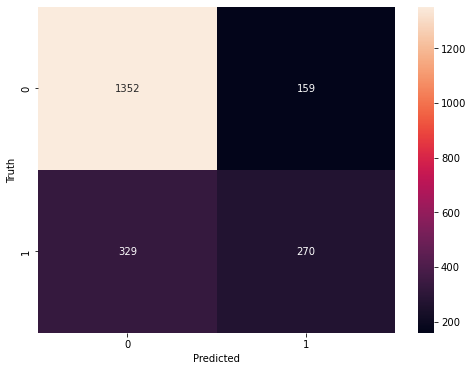

In [44]:
import tensorflow as tf
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

I am using SMOTE libray to oversample the dataset and making total number of Curn value 0 and Churn of value 1 equal,
by adding new rows whose value is 1.

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.3,stratify=y_sm)

In [48]:
import tensorflow as tf
with tf.device('/GPU:0'):
    import keras
    model=keras.Sequential([
        keras.layers.Dense(20,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(5,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy'])

    model.fit(X_train,y_train,epochs=100)


Epoch 1/100
226/226 [==============================] - 1s 5ms/step - loss: 0.5997 - accuracy: 0.6711
Epoch 2/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4803 - accuracy: 0.7759
Epoch 3/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4695 - accuracy: 0.7796
Epoch 4/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4622 - accuracy: 0.7791
Epoch 5/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4561 - accuracy: 0.7815
Epoch 6/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4521 - accuracy: 0.7842
Epoch 7/100
226/226 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.7842
Epoch 8/100
226/226 [==============================] - 1s 4ms/step - loss: 0.4453 - accuracy: 0.7858
Epoch 9/100
226/226 [==============================] - 1s 3ms/step - loss: 0.4423 - accuracy: 0.7872
Epoch 10/100
226/226 [==============================] - 1s 3ms/step - loss: 0.4389 - accura

In [49]:
yp=model.predict(X_test)
yp[:5]

array([[0.7703171 ],
       [0.60340685],
       [0.8357866 ],
       [0.93418455],
       [0.93170553]], dtype=float32)

In [50]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1549
           1       0.78      0.84      0.81      1549

    accuracy                           0.80      3098
   macro avg       0.80      0.80      0.80      3098
weighted avg       0.80      0.80      0.80      3098



Befor smoting

               precision    recall  f1-score   support

           0       0.80      0.89      0.85      1511
           1       0.63      0.45      0.53       599

    accuracy                           0.77      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.75      0.77      0.76      2110


Now we can see the precision,recall and f1 has improved.

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb=XGBClassifier()
with tf.device('/GPU:0'):
    xgb.fit(X_train,y_train)

[20:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\brago\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [54]:
xgb_pred=xgb.predict(X_test)
xgb_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [56]:
print(classification_report(xgb_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1445
           1       0.86      0.80      0.83      1653

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
with tf.device('/GPU:0'):
    sgd=cross_val_score(SGDClassifier(),X_train,y_train,cv=5)
    print("%0.2f accuracy score with standard deviation of %2f "% (sgd.mean(),sgd.std()))

0.80 accuracy score with standard deviation of 0.015556 


In [ ]:
Conclusion 

After training the model over three models,
XGBoostClassifier, ANN and SGDClassifier, XGBoost has given the best accuracy.